# scikit-learn

* http://scikit-learn.org/stable/

In [1]:
%matplotlib inline

In [27]:
import numpy as np
import matplotlib.pyplot as plt

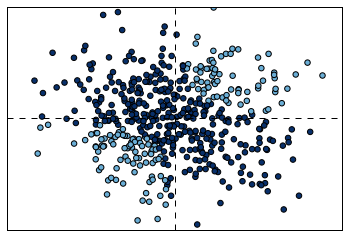

In [18]:
x = np.random.randn(500, 2)
y = x[:, 0] * x[:, 1] < 0.25 

def set_plot():
    plt.axhline(0, color='k', ls='--')
    plt.axvline(0, color='k', ls='--')
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])

def plot_data_points(x, y):
    cmap = plt.cm.Blues
    plt.scatter(x[:, 0], x[:, 1], s=30, c=.5+.5*y, lw=1, cmap=cmap, vmin=0, vmax=1)
    set_plot()

plot_data_points(x, y)

## 学習

In [26]:
import sklearn
import sklearn.cross_validation
import sklearn.grid_search
import sklearn.svm

In [20]:
est = sklearn.grid_search.GridSearchCV(
    sklearn.svm.SVC(),
    {'C': np.logspace(-3., 3., 10), 'gamma': np.logspace(-3., 3., 10)}
)
est.fit(x, y)


score = sklearn.cross_validation.cross_val_score(est, x, y).mean()
print('Score: {0:.3f}'.format(score))
est

Score: 0.972


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-03,   4.64159e-03,   2.15443e-02,   1.00000e-01,
         4.64159e-01,   2.15443e+00,   1.00000e+01,   4.64159e+01,
         2.15443e+02,   1.00000e+03]), 'C': array([  1.00000e-03,   4.64159e-03,   2.15443e-02,   1.00000e-01,
         4.64159e-01,   2.15443e+00,   1.00000e+01,   4.64159e+01,
         2.15443e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

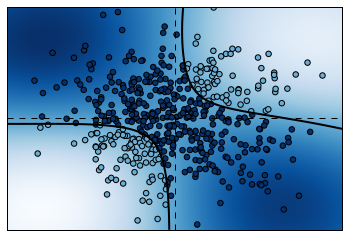

In [23]:
def plot_decision_function(est, x, y):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
    z = est.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    cmap = plt.cm.Blues
    plt.imshow(z,
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               aspect='auto', origin='lower',
               cmap=cmap)
    plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='k')
    plt.scatter(x[:, 0], x[:, 1], s=30, c=.5+.5*y, lw=1, cmap=cmap, vmin=0, vmax=1)
    set_plot()

plot_decision_function(est.best_estimator_, x, y)